# Iris Dataset

In [23]:
import pandas as pd
import kmeans as km
import matplotlib.pyplot as plt

df = pd.read_csv('./iris.csv')

### Sepal Length vs Sepal Width

In [ ]:
df_copy = df.copy()
df_copy.drop(columns=['species'], inplace=True)
df_copy.drop(columns=['petal_length'], inplace=True)
df_copy.drop(columns=['petal_width'], inplace=True)

kmeans = km.Kmeans(df_copy, 3, 0.001)
clusters = kmeans.clustering(1000)

plt.scatter(df_copy['sepal_length'], df_copy['sepal_width'], c=clusters)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red')
plt.show()

### Petal Length vs Petal Width

In [ ]:
df_copy = df.copy()
df_copy.drop(columns=['species'], inplace=True)
df_copy.drop(columns=['sepal_length'], inplace=True)
df_copy.drop(columns=['sepal_width'], inplace=True)

kmeans = km.Kmeans(df_copy, 3, 0.001)
clusters = kmeans.clustering(1000)

plt.scatter(df_copy['petal_length'], df_copy['petal_width'], c=clusters)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red')
plt.show()

## Segmentación de Imágenes

In [84]:
import importlib
import rbg
importlib.reload(rbg)
import kmeans as km
from PIL import Image

def reduce_colors(path, name, k, max_iter, convergence):
    df_img, width, height = rbg.img_to_RGB(path)
    kmeans_img = km.Kmeans(df_img, k, convergence)
    clusters_img = kmeans_img.clustering(max_iter)

    df_img_clustered = df_img.copy()
    for i in range(len(df_img_clustered)):
        centroid_values = kmeans_img.centroids[clusters_img[i]]
        df_img_clustered.at[i, 'R'] = round(centroid_values[0])
        df_img_clustered.at[i, 'G'] = round(centroid_values[1])
        df_img_clustered.at[i, 'B'] = round(centroid_values[2])

    image_array = df_img_clustered[['R', 'G', 'B']].values.reshape((width, height, 3)).astype('uint8')
    img = Image.fromarray(image_array)
    img = img.transpose(Image.Transpose.ROTATE_270)
    img.save('./img/clustered/' + name + '_k' + str(k) + '_max_iter' + str(max_iter) + '.png')

    #return img_rotated


C:\Users\valer\AppData\Local\Temp\ipykernel_27056\374330346.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


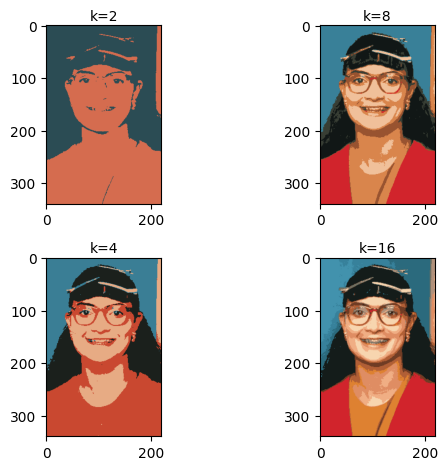

In [92]:
k = [2, 4, 8, 16, 32, 64, 128, 256]

for i in k:
    reduce_colors('./img/betty.png', 'betty', i, 1000, 0.001)

fig,ax = plt.subplots(2,2)
filenames=['./img/clustered/betty_k{}_max_iter1000.png'.format(i) for i in k]
for i in range(len(filenames)):
    with open(filenames[i],'rb') as f:
        image=Image.open(f)
        ax[i%2][i//2].imshow(image)
        ax[i % 2][i // 2].text(0.5, 1.05, f'k={k[i]}', ha='center', va='center', transform=ax[i % 2][i // 2].transAxes)

plt.tight_layout()
fig.show()